# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


##### 1. What does the data describe?

The data describes the participation rate of students in each state and DC and the average scores students get in both the math and verbal sections of the SAT.

##### 2. Does the data look complete? Are there any obvious issues with the observations?

The data looks complete.  Issues:  Old data, low participation rate leads to higher math and verbal averages that aren't indicative of the states actual performance.

##### 3. Create a data dictionary for the dataset.

State: Abbreviation of each state in the US and DC.
Rate: Participation rate of students in each state.
Verbal: average score in the verbal section in each state.
Math: average score in the math section in each state.
'All' represents the average of all the states.

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [219]:
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns
import pandas as pd
%matplotlib inline

rows = []

with open('../assets/sat_scores.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        rows.append(row)

##### 5. Print the data

In [206]:
print rows

[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [207]:
header = rows[0]
data = rows[1:-1]

##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [208]:
state_names = [x for x,y,z,d in data]
state_names.sort()
print state_names

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


##### 8. Print the types of each column

In [209]:
type_list = [(type(x),type(y),type(z),type(d)) for x,y,z,d in data]
type_list

[(str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str, str, str),
 (str, str,

##### 9. Do any types need to be reassigned? If so, go ahead and do it.

In [210]:
type_recast_list = [(x,int(y),int(z),int(d)) for x,y,z,d in data]
type_recast_list

[('CT', 82, 509, 510),
 ('NJ', 81, 499, 513),
 ('MA', 79, 511, 515),
 ('NY', 77, 495, 505),
 ('NH', 72, 520, 516),
 ('RI', 71, 501, 499),
 ('PA', 71, 500, 499),
 ('VT', 69, 511, 506),
 ('ME', 69, 506, 500),
 ('VA', 68, 510, 501),
 ('DE', 67, 501, 499),
 ('MD', 65, 508, 510),
 ('NC', 65, 493, 499),
 ('GA', 63, 491, 489),
 ('IN', 60, 499, 501),
 ('SC', 57, 486, 488),
 ('DC', 56, 482, 474),
 ('OR', 55, 526, 526),
 ('FL', 54, 498, 499),
 ('WA', 53, 527, 527),
 ('TX', 53, 493, 499),
 ('HI', 52, 485, 515),
 ('AK', 51, 514, 510),
 ('CA', 51, 498, 517),
 ('AZ', 34, 523, 525),
 ('NV', 33, 509, 515),
 ('CO', 31, 539, 542),
 ('OH', 26, 534, 439),
 ('MT', 23, 539, 539),
 ('WV', 18, 527, 512),
 ('ID', 17, 543, 542),
 ('TN', 13, 562, 553),
 ('NM', 13, 551, 542),
 ('IL', 12, 576, 589),
 ('KY', 12, 550, 550),
 ('WY', 11, 547, 545),
 ('MI', 11, 561, 572),
 ('MN', 9, 580, 589),
 ('KS', 9, 577, 580),
 ('AL', 9, 559, 554),
 ('NE', 8, 562, 568),
 ('OK', 8, 567, 561),
 ('MO', 8, 577, 577),
 ('LA', 7, 564, 5

##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [211]:
dict = {x: [y, z, d] for x,y,z,d in type_recast_list}
dict

{'AK': [51, 514, 510],
 'AL': [9, 559, 554],
 'AR': [6, 562, 550],
 'AZ': [34, 523, 525],
 'CA': [51, 498, 517],
 'CO': [31, 539, 542],
 'CT': [82, 509, 510],
 'DC': [56, 482, 474],
 'DE': [67, 501, 499],
 'FL': [54, 498, 499],
 'GA': [63, 491, 489],
 'HI': [52, 485, 515],
 'IA': [5, 593, 603],
 'ID': [17, 543, 542],
 'IL': [12, 576, 589],
 'IN': [60, 499, 501],
 'KS': [9, 577, 580],
 'KY': [12, 550, 550],
 'LA': [7, 564, 562],
 'MA': [79, 511, 515],
 'MD': [65, 508, 510],
 'ME': [69, 506, 500],
 'MI': [11, 561, 572],
 'MN': [9, 580, 589],
 'MO': [8, 577, 577],
 'MS': [4, 566, 551],
 'MT': [23, 539, 539],
 'NC': [65, 493, 499],
 'ND': [4, 592, 599],
 'NE': [8, 562, 568],
 'NH': [72, 520, 516],
 'NJ': [81, 499, 513],
 'NM': [13, 551, 542],
 'NV': [33, 509, 515],
 'NY': [77, 495, 505],
 'OH': [26, 534, 439],
 'OK': [8, 567, 561],
 'OR': [55, 526, 526],
 'PA': [71, 500, 499],
 'RI': [71, 501, 499],
 'SC': [57, 486, 488],
 'SD': [4, 577, 582],
 'TN': [13, 562, 553],
 'TX': [53, 493, 499],


##### 11. Create a dictionary with the values for each of the numeric columns

In [212]:
rate_list = [y for x,y,z,d in type_recast_list]
first_dict = {"Rate": rate_list}

verbal_list = [z for x,y,z,d in type_recast_list]
second_dict = {"Verbal": verbal_list}

math_list = [d for x,y,z,d in type_recast_list]
third_dict = {"Math": math_list}

dict_list = [first_dict,second_dict,third_dict]
dict_list

[{'Rate': [82,
   81,
   79,
   77,
   72,
   71,
   71,
   69,
   69,
   68,
   67,
   65,
   65,
   63,
   60,
   57,
   56,
   55,
   54,
   53,
   53,
   52,
   51,
   51,
   34,
   33,
   31,
   26,
   23,
   18,
   17,
   13,
   13,
   12,
   12,
   11,
   11,
   9,
   9,
   9,
   8,
   8,
   8,
   7,
   6,
   6,
   5,
   5,
   4,
   4,
   4]},
 {'Verbal': [509,
   499,
   511,
   495,
   520,
   501,
   500,
   511,
   506,
   510,
   501,
   508,
   493,
   491,
   499,
   486,
   482,
   526,
   498,
   527,
   493,
   485,
   514,
   498,
   523,
   509,
   539,
   534,
   539,
   527,
   543,
   562,
   551,
   576,
   550,
   547,
   561,
   580,
   577,
   559,
   562,
   567,
   577,
   564,
   584,
   562,
   575,
   593,
   577,
   592,
   566]},
 {'Math': [510,
   513,
   515,
   505,
   516,
   499,
   499,
   506,
   500,
   501,
   499,
   510,
   499,
   489,
   501,
   488,
   474,
   526,
   499,
   527,
   499,
   515,
   510,
   517,
   525,
   515,
   542,
   

## Step 3: Describe the data

##### 12. Print the min and max of each column

In [213]:
rate_list.sort()
print "Rate Min: ", rate_list[0]
print "Rate Max: ", rate_list[-1]

verbal_list.sort()
print "Verbal Min: ", verbal_list[0]
print "Verbal Max: ", verbal_list[-1]

math_list.sort()
print "Math Min: ", math_list[0]
print "Math Max: ", math_list[-1]

Rate Min:  4
Rate Max:  82
Verbal Min:  482
Verbal Max:  593
Math Min:  439
Math Max:  603


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [214]:
rate_mean = np.mean(rate_list)
rate_mean_2 = [(x-rate_mean)**2 for x in rate_list]
rate_mean_3 = np.sqrt(np.mean(rate_mean_2))
print "Standard Deviation of Rate: ", rate_mean_3

verbal_mean = np.mean(verbal_list)
verbal_mean_2 = [(x-verbal_mean)**2 for x in verbal_list]
verbal_mean_3 = np.sqrt(np.mean(verbal_mean_2))
print "Standard Deviation of Verbal: ", verbal_mean_3

math_mean = np.mean(math_list)
math_mean_2 = [(x-math_mean)**2 for x in math_list]
math_mean_3 = np.sqrt(np.mean(math_mean_2))
print "Standard Deviation of Math: ", math_mean_3

Standard Deviation of Rate:  27.2792386761
Standard Deviation of Verbal:  33.0319826842
Standard Deviation of Math:  35.9298731731


In [215]:
rate_median = np.median(rate_list)
verbal_median = np.median(verbal_list)
math_median = np.median(math_list)

rate_mode = stats.mode(rate_list).mode[0]
verbal_mode = stats.mode(verbal_list).mode[0]
math_mode = stats.mode(math_list).mode[0]

print "Rate mean: ", rate_mean
print "Rate median: ", rate_median
print "Rate mode: ", rate_mode

print "\nVerbal mean: ", verbal_mean
print "Verbal median: ", verbal_median
print "Verbal mode: ", verbal_mode

print "\nMath mean: ", math_mean
print "Math median: ", math_median
print "Math mode: ", math_mode

Rate mean:  37.0
Rate median:  33.0
Rate mode:  4

Verbal mean:  532.529411765
Verbal median:  527.0
Verbal mode:  562

Math mean:  531.843137255
Math median:  525.0
Math mode:  499


## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

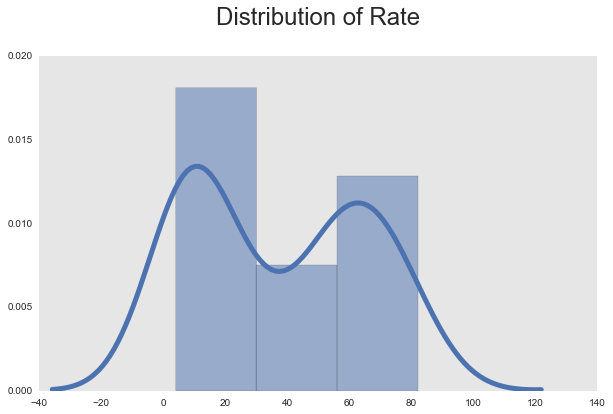

In [216]:
def distribution_plotter(column, data):
    sns.set(rc={"figure.figsize": (10, 6)})
    sns.set_style("dark", {"axes.facecolor": ".9"})
    dist = sns.distplot(data, hist_kws={'alpha':0.5}, kde_kws={'linewidth':5})
    dist.set_title('Distribution of ' + column + '\n', fontsize=24)

distribution_plotter('Rate', first_dict['Rate'])

##### 15. Plot the Math distribution

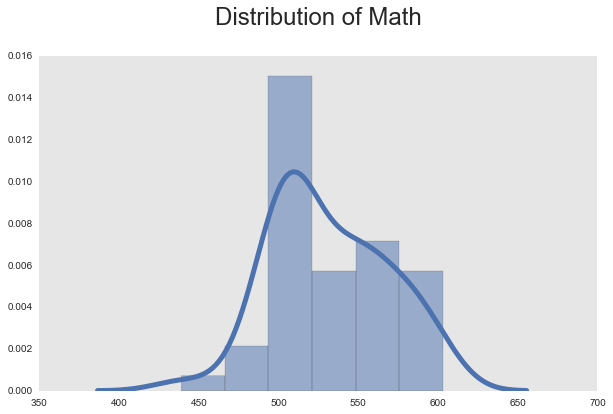

In [217]:
distribution_plotter('Math', third_dict['Math'])

##### 16. Plot the Verbal distribution

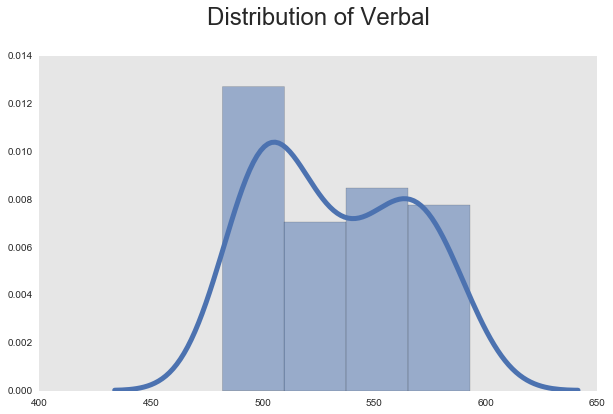

In [218]:
distribution_plotter('Verbal', second_dict['Verbal'])

##### 17. What is the typical assumption for data distribution?

The typical assumption is that it would be a bell curve.  That there would be a mean near the middle with upper and lower scores being less likely.

##### 18. Does that distribution hold true for our data?

No. The low participation States create a surge of scores at a higher average throwing off the bell curve.

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

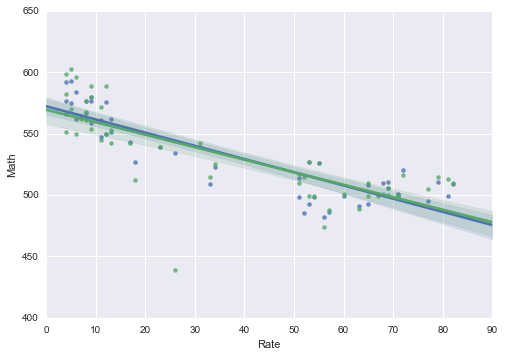

In [198]:
df = pd.read_csv('../assets/sat_scores.csv')
df = df[df['State'] != 'All']

sns.set(color_codes=True)
ax = sns.regplot(x="Rate", y="Verbal", data=df)
az = sns.regplot(x="Rate", y="Math", data=df)

##### 20. Are there any interesting relationships to note?

Lower participation rate has higher average scores while high participation rate has lower average scores.  States with lower participation scores are more likely to score higher as the SAT is optional and students with strong acedemic capabilities are more likely to take the test than poorly performing students.

##### 21. Create box plots for each variable. 

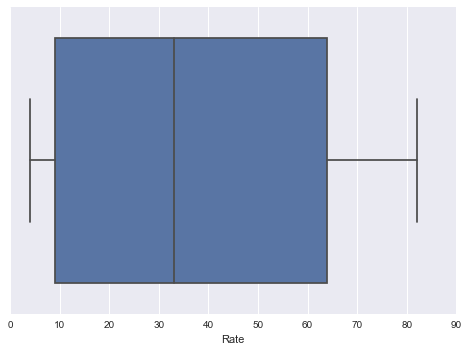

In [200]:
sns.set_style("darkgrid")
ax = sns.boxplot(x=df["Rate"])

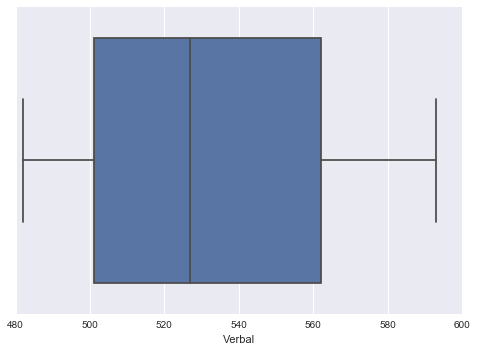

In [201]:
az = sns.boxplot(x=df["Verbal"])

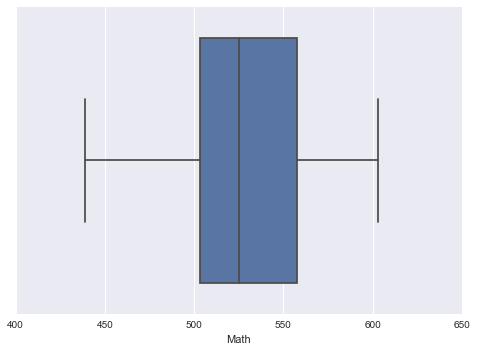

In [202]:
ad = sns.boxplot(x=df["Math"])

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

# ![](../assets/Rate.png) 2001 Rate of Student Participation in the SAT

# ![](../assets/Math.png) 2001 SAT Verbal Scores

# ![](../assets/Math.png) 2001 SAT Math Scores